In [285]:
# Appendix B
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [286]:
# Only using these for convenience, no real NN packages such as Keras used
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [287]:
# Load the data
data = pd.read_csv('Housing_Data.csv')

In [288]:
# Data cleaning
data = data[pd.to_numeric(data['floorArea'], errors='coerce').notnull()]
data = data[pd.to_numeric(data['pricePerSqFt'], errors='coerce').notnull()]
data = data.dropna()

# Convert columns to appropriate types
data['floorArea'] = pd.to_numeric(data['floorArea'], errors='coerce').astype('float32')
data['pricePerSqFt'] = pd.to_numeric(data['pricePerSqFt'], errors='coerce').astype('float32')

In [289]:
# Prepare the data
X = data[['floorArea', 'bedrooms']].values
data['totalPrice'] = data['floorArea'] * data['pricePerSqFt']
y = data['totalPrice'].values

In [290]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape y before scaling
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Scale x and y using StandardScaler
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [291]:
# Initialize parameters and set hyperparameters
input_size = X_train.shape[1]
output_size = 1
hidden_size = 2

epochs = 1000
learning_rate = 0.01
batch_size = 96

train_errors = []
test_errors = []

In [292]:
# Initialize weights and biases with small random values and zeros
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Activation and loss functions, using relu and mse
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [293]:
# Training loop

for epoch in range(epochs):
    # Shuffle the training data
    indices = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]

    # Mini-batch processing
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train_shuffled[i:i + batch_size]
        y_batch = y_train_shuffled[i:i + batch_size]

        # Forward propagation
        Z1 = np.dot(X_batch, W1) + b1
        A1 = relu(Z1)
        Z2 = np.dot(A1, W2) + b2

        # Backpropagation
        dA2 = Z2 - y_batch
        dW2 = np.dot(A1.T, dA2) / len(y_batch)
        db2 = np.sum(dA2, axis=0, keepdims=True) / len(y_batch)

        dA1 = np.dot(dA2, W2.T) * relu_derivative(Z1)
        dW1 = np.dot(X_batch.T, dA1) / len(y_batch)
        db1 = np.sum(dA1, axis=0, keepdims=True) / len(y_batch)

        # Update weights and biases
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

    # Calculate training error after each epoch
    Z1_train = np.dot(X_train, W1) + b1
    A1_train = relu(Z1_train)
    Z2_train = np.dot(A1_train, W2) + b2
    train_loss = mse(y_train, Z2_train)
    train_errors.append(train_loss)

    # Calculate test error after each epoch
    Z1_test = np.dot(X_test, W1) + b1
    A1_test = relu(Z1_test)
    Z2_test = np.dot(A1_test, W2) + b2
    test_loss = mse(y_test, Z2_test)
    test_errors.append(test_loss)

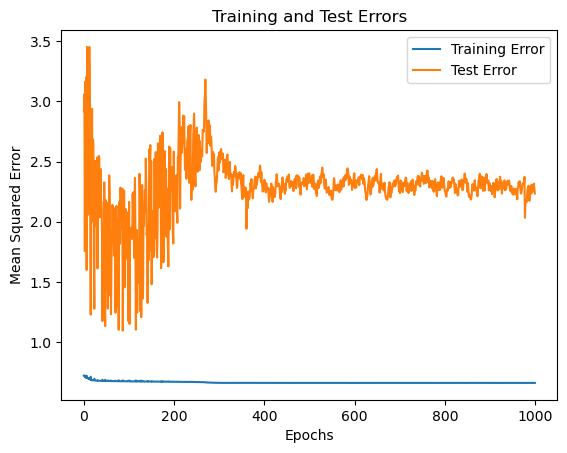

In [294]:
# Plot training and test errors
plt.plot(train_errors, label='Training Error')
plt.plot(test_errors, label='Test Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Errors')
plt.legend()
plt.show()

In [295]:
# Invert transformed values
X_train = scaler_x.inverse_transform(X_train)
X_test = scaler_x.inverse_transform(X_test)

y_train = scaler_y.inverse_transform(y_train)
y_test = scaler_y.inverse_transform(y_test)

# Forward propagation for predictions
def predict(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    return Z2

# Make predictions on the test set
y_pred = predict(X_test, W1, b1, W2, b2)

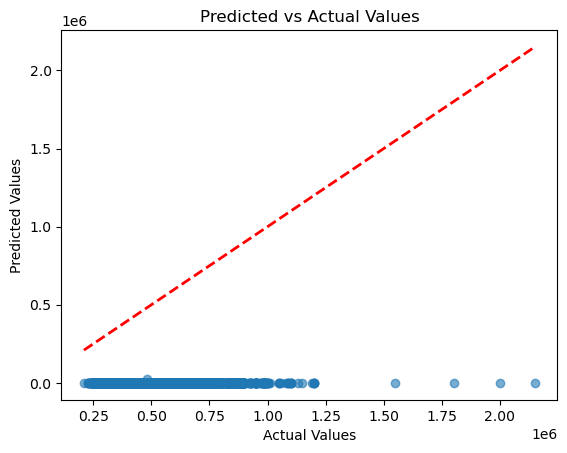

In [296]:
# Plot predicted vs actual values
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

In [297]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE) on test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

Mean Squared Error on Test Set: 260386012265.86407
